<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Day 2) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

This dataset is created for the prediction of Graduate admissions from an Indian perspective. The dataset contains various features that are important during the application for the Master's Program. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a student for admission.

## About the dataset (Graduate admissions prediction data) 

**Serial No.:** Serial number of student 

**GRE Scores:** GRE score (out of 340)

**TOEFL Scores:** TOEFL score (out of 120)

**University Rating:** University rating (out of 5)

**SOP:** Strength of Statement of Purpose (out of 5)

**LOR:** Strength of Letter of Recommendation (out of 5)

**CGPA:** Undergraduate CGPA (out of 10)

**Research:** Research experience (either 0 or 1)

**Chance of Admit:** Chance of admission (target/dependent variable)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.7 - **[Train-Test Split](#split)**
3. **[Decision Tree for Classification](#DT)**
    - 3.1 - **[Tune the Hyperparameters using GridSearchCV (Decision Tree)](#hyper)**
4. **[Random Forest for Classification](#rf)**
    - 4.1 - **[Tune the Hyperparameters using GridSearchCV (Random Forest)](#hyper_rf)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay  #****


# import pydotplus
from IPython.display import Image  

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [3]:
df_admissions = pd.read_csv('Admission_predict.csv')
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


**Let us now see the number of variables and observations in the data.**

In [4]:
df_admissions.shape

(400, 9)

**Interpretation:** The data has 400 observations and 9 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

**Interpretation:** The variables `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, and `CGPA` are numerical.

From the above output, we see that the data type of `Research` is 'int64'.

But according to the data definition, `Research` is a categorical variable, which is wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [6]:
# convert numerical variables to categorical (object) 
df_admissions['Research'] = df_admissions['Research'].astype(object)

#### Recheck the data type after the conversion. 

In [7]:
# recheck the data types using 'dtypes'
df_admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit        int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `Serial No.` contains the serial number of the student, which is redundant for further analysis. Thus, we drop the column.

In [8]:
# drop the column 'Serial No.' using drop()
df_admissions = df_admissions.drop('Serial No.', axis = 1)

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

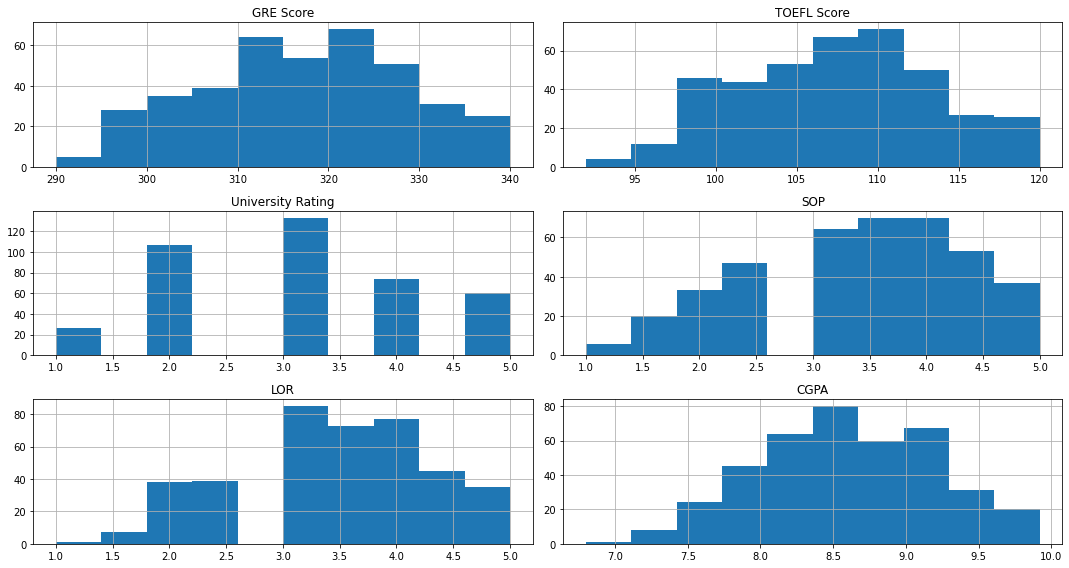

Skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [9]:
df_admissions.drop('Chance of Admit', axis = 1).hist()


plt.tight_layout()
plt.show()  

print('Skewness:')
df_admissions.drop('Chance of Admit', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are near normally distributed.

**Distribution of categoric independent variable.**

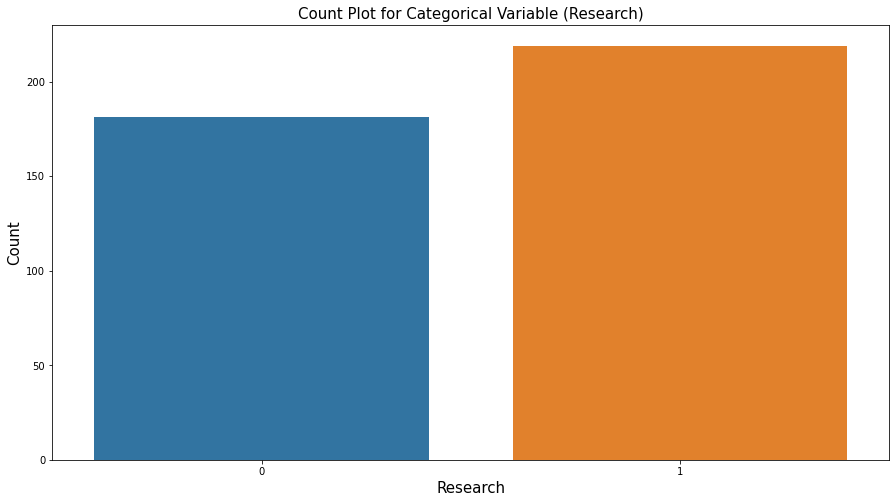

In [10]:
sns.countplot(df_admissions.Research)

plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

#### Distribution of dependent variable.

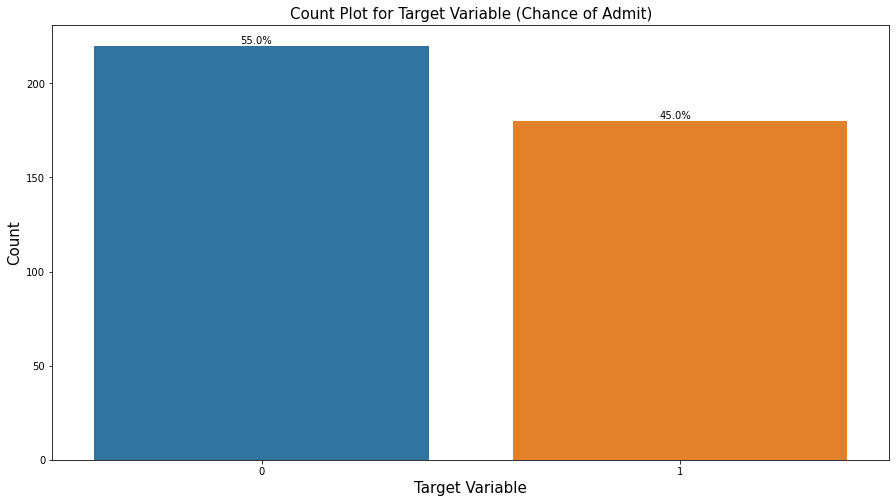

In [11]:
df_target = df_admissions['Chance of Admit'].copy()

df_target.value_counts()

sns.countplot(x = df_target)

plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

**Interpretation:** The above plot shows that there is no imbalance in the target variable.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [12]:
Total = df_admissions.isnull().sum().sort_values(ascending=False)          

Percent = (df_admissions.isnull().sum()*100/df_admissions.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
GRE Score,0,0.000000
TOEFL Score,0,0.000000
University Rating,0,0.000000
SOP,0,0.000000
LOR,0,0.000000
CGPA,0,0.000000
Research,0,0.000000
Chance of Admit,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.6 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [13]:
df_target = df_admissions['Chance of Admit']

df_feature = df_admissions.drop('Chance of Admit', axis = 1)

#### Filter numerical and categorical variables.

In [14]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [15]:
df_cat = df_feature.select_dtypes(include = [np.object])
df_cat.columns

Index(['Research'], dtype='object')

Sklearn's tree algorithms fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [16]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [17]:
X = pd.concat([df_num, dummy_var], axis = 1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,337,118,4,4.500000,4.500000,9.650000,1
1,324,107,4,4.000000,4.500000,8.870000,1
2,316,104,3,3.000000,3.500000,8.000000,1
3,322,110,3,3.500000,2.500000,8.670000,1
4,314,103,2,2.000000,3.000000,8.210000,0


<a id="split"></a>
## 2.7 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 7)
y_train (320,)
X_test (80, 7)
y_test (80,)


#### Create a generalized function to calculate the metrics for the train and the test set.

In [19]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [20]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

<a id="DT"></a>
# 3. Decision Tree for Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

## Gini Index

Gini index measures the probability of the sample being wrongly classified. The value of the Gini index varies between 0 and 1. We choose the variable with a low Gini index. The Gini index of the variable is calculated as:
<p style='text-indent:28em'> <strong> $ Gini = 1 - \sum_{i = 1}^{n}p_{i}^{2} $</strong> </p>

Where,<br> 
$p_{i}$: Probability of occurrence of the class 'i'

## Entropy

Entropy is one of the criteria used to build the decision tree. It calculates the heterogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided. Entropy of the variable 'X' is calculated as:
<p style='text-indent:28em'> <strong> $ E(X) =  -\sum_{i = 1}^{c}p_{i}log_{2}p_{i} $</strong> </p>

Where,<br> 
$p_{i}$: Probability of occurrence of the class 'i'

And the conditional emtropy of the variable is given as:
<p style='text-indent:28em'> <strong> $ E(T, X) = \sum_{c \epsilon X}P(c)E(c) $</strong> </p>

Where,<br> 
$P(c)$: Probability of occurrence of the class 'c'<br>
$E(c)$: Entropy of the class 'c'

The information gain is the difference between the entropy of the target variable and the entropy of the target variable given an independent variable. We split the on the variable that corresponds to the highest information gain. 

#### Build a full decision tree model on a train dataset using 'entropy'.

In [21]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

#### Plot a decision tree.

To visualize our decision tree we will use 'plot_tree'

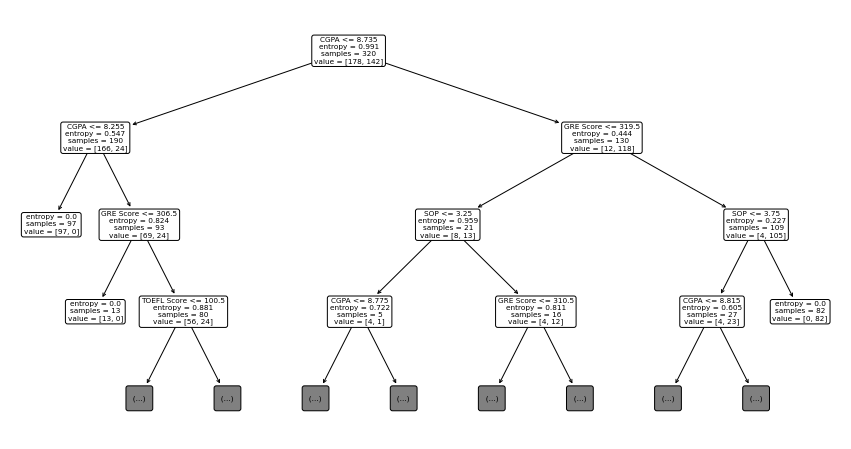

In [22]:
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns,rounded=True)
plt.show()

In [23]:
### OPTIONAL

# Visualize tree  using Graphviz website 
class_label = ['0','1']  # For display

from IPython.display import Image  

Credit_Tree_File = open('my_tree.txt','w')
tree.export_graphviz(decision_tree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(class_label))

Credit_Tree_File.close()

# Copy the file content on website "webgraphviz.com" go visoualize the tree


## Over-fitting in Decision Tree

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

**Calculate performance measures on the train set.**

In [24]:
# compute the performance measures on train data
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



**Calculate performance measures on the test set.**

In [25]:
# compute the performance measures on test data
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

#### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [26]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X_train, y_train)

# compute the performance measures on train data and test data
train_report = get_train_report(decision_tree)
print('Train data:\n', train_report)

test_report = get_test_report(decision_tree)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       178
           1       0.94      0.85      0.89       142

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320

Test data:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



**Interpretation:** From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

<a id="hyper"></a>
## 3.1 Tune the Hyperparameters using GridSearchCV (Decision Tree)

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the ` GridSearchCV()` and build the tree using the optimal values obtained using GridSearch method.

In [27]:
# Define parameter grid
tuned_paramaters = [{ # 'criterion': ['entropy', 'gini'],    #***
                     'max_depth': range(2, 10),
                    # 'max_features': ["sqrt", "log2"],   #***
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                   #  'max_leaf_nodes': range(1, 10)    #*** 
                    }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} 



#### Build the model using the tuned hyperparameters.

In [28]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier( #criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
#                                   max_features = tree_grid_model.best_params_.get('max_features'),
                                 # max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

**Plot the decision tree with tuned hyperparameters.**

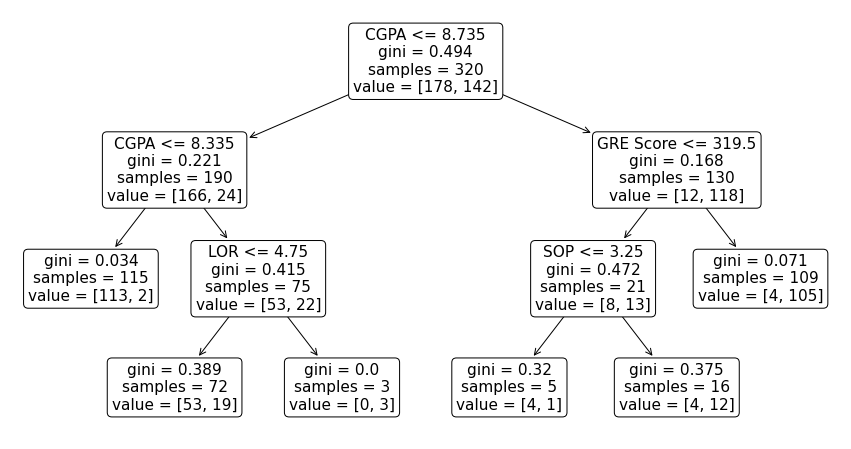

In [29]:
tree.plot_tree(decision_tree,feature_names=X_train.columns,rounded=True)
plt.show()

**Interpretation:** Initially the split is at the variable `GRE Score <= 319.5`. Thus, for the student if the GRE score is less than or equal to 319.5; it will satisfy the condition and further check the condition on the left internal node. i.e. `TOEFL Score <= 106.5`. On the other hand, if the GRE score is greater than 319.5; the tree checks for the condition on the right internal node. i.e. `University Rating <= 3.5`. 

For a node, `entropy` represents the entopy of the target variable. `samples` represents the number of samples in the node. `Value` indicates the number of samples in each class of the target variable, and `class` represents the label of the majority class in the node.

**Calculate performance measures on the train set.**

In [30]:
# print the performance measures for train set for the model with best parameters
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       178
           1       0.94      0.85      0.89       142

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320



In [32]:
dt_model.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research_1'], dtype=object)

**Calculate performance measures on the test set.**

In [33]:
# print the performance measures for test set for the model with best parameters
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



<AxesSubplot:>

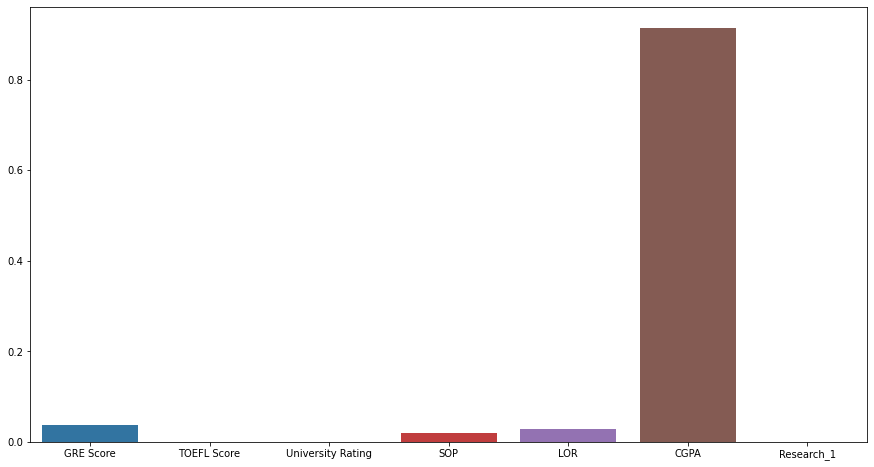

In [33]:
sns.barplot(dt_model.feature_names_in_,dt_model.feature_importances_)

**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

<a id="rf"></a>
# 4. Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [34]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

**Calculate performance measures on the train set.**

In [35]:
# compute the performance measures on train data
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       178
           1       1.00      0.99      0.99       142

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



**Calculate performance measures on the test set.**

In [35]:
# compute the performance measures on test data
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       0.77      0.87      0.81        38

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



<a id="hyper_rf"></a>
## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [36]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = [{   # 'criterion': ['entropy', 'gini'],   #***
                     'n_estimators': [10, 30, 50],   #*** , 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                    # 'min_samples_leaf': [1, 5, 9],     #***
                    # 'max_leaf_nodes': [2, 5, 8, 11]   #***
                    }]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 30} 



#### Build the model using the tuned hyperparameters.

In [37]:
rf_model = RandomForestClassifier( # criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                #  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                #  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

rf_model = rf_model.fit(X_train, y_train)

print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.82      0.87      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



**Interpretation:** The `accuracy` of the test dataset increased from 0.81 to 0.84 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

### Identify the Important Features

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of total decrease in `Gini impurity` across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, `Gini Importance`.

There is another `accuracy-based` method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. 
The `out-of-bag` samples are the samples in the training dataset which are not considered whild building a tree.

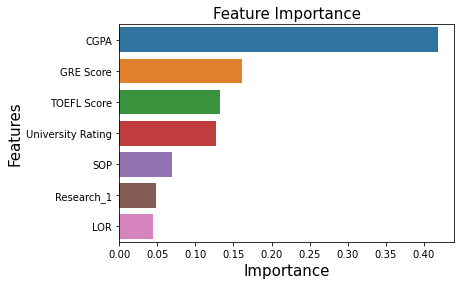

In [38]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**Interpretation:** From the above bar plot, we can see that `CGPA` is the most important feature in the dataset.